In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [128]:
df=pd.read_csv("loan_data_2007_2014.csv")

C:\Temp\ipykernel_10940\1835913424.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("loan_data_2007_2014.csv")


# Data Understanding

In [129]:
df.shape

(466285, 75)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [131]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Menentukan yang ingin di drop

In [132]:
# mengetahui apasaja column yang ada
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [133]:
# menegecek adakah column yang hanya punya satu record unique
for column in df.columns:
  if len(df[column].unique()) == 1:
    print("\'" + column + "\',")

'policy_code',
'application_type',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'inq_fi',
'total_cu_tl',
'inq_last_12m',


In [134]:
# menegecek adakah column yang punya unique setiap row
for column in df.columns:
  if len(df[column].unique()) == df.shape[0]:
    print("\'" + column + "\',")

'Unnamed: 0',
'id',
'member_id',
'url',


In [135]:
# Mengecek column apa saja yang memiliki jumlah null nya adalah 80% dari jumlah seluruh row
for column in df.columns:
  if df[column].isna().sum() / len(df) > 0.8:
    print("\'" + column + "\',")

'mths_since_last_record',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'inq_fi',
'total_cu_tl',
'inq_last_12m',


In [136]:
dropColumn = [
    # unique
    'id',
    'Unnamed: 0',
    
    
    # free text
    'url',
    
    # unique column
    'Unnamed: 0',
    'id',
    'member_id',
    'zip_code',
    
    # hanya satu record unique
    'policy_code',
    'application_type',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    
    # column apa saja yang memiliki jumlah null nya adalah 80% dari jumlah seluruh row
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_record',
]

In [137]:
df = df.drop(dropColumn, axis = 1).copy()

In [138]:
df.shape

(466285, 50)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

In [140]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


## Menuntukan label target

Column 'loan status' dipakai karena paling masuk akal untuk prediksi apakah seseorang akan mengembalikan pinjaman apa tidak

In [141]:
df['loan_status'].replace({
    'Fully Paid': 1,
    'Charged Off': 0,
    'Current': 1,
    'Late (31-120 days)': 0,
    'In Grace Period': 0,
    'Late (16-30 days)': 0,
    'Default': 0,
    'Does not meet the credit policy. Status:Fully Paid' : 1,
    'Does not meet the credit policy. Status:Charged Off' : 0,    
}, inplace = True)

In [142]:
df['loan_status'].value_counts()

1    410953
0     55332
Name: loan_status, dtype: int64

In [143]:
df.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
desc                           340302
purpose                             0
title                              20
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
open_acc                           29
pub_rec     

In [144]:
# tidak ada row yang duplicate
df.duplicated().sum()

0

### Mengganti term, emp_length ke bentuk number

In [145]:
# buat atribut baru yang berisi integer dari term
df['term_month'] = df['term'].str.replace(r'months', r'')
df['emp_length'].unique()
df['emp_length_num'] = df['emp_length'].str.replace(r'\+ years', r'').str.replace(r'< 1 year', r'1').str.replace(r' year', r'').str.replace(r's', r'')

C:\Temp\ipykernel_10940\882243432.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_num'] = df['emp_length'].str.replace(r'\+ years', r'').str.replace(r'< 1 year', r'1').str.replace(r' year', r'').str.replace(r's', r'')


In [146]:
# DROP atribut yang sudah tidak terpakai
df = df.drop([
  'emp_length',
  'term',
  # free text
  'desc'
  ], axis=1).copy()

In [147]:
df.grade.value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

## Convert Type data

In [148]:
df['term_month'] = df['term_month'].astype('float32')
df['emp_length_num'] = df['emp_length_num'].astype('Int64')

## Penanganan data dengan korelasi tinggi

C:\Temp\ipykernel_10940\1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

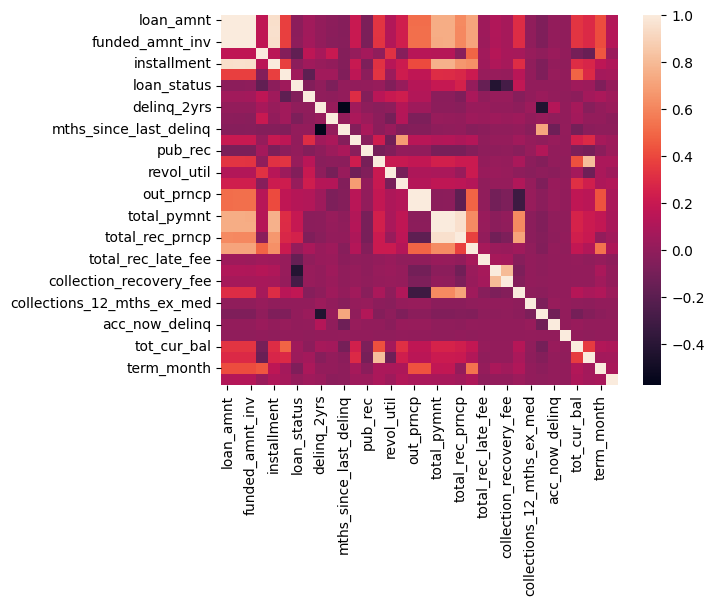

In [149]:
sns.heatmap(df.corr())

bisa dilihat dari hetamap diatas ada beberapa atribut yang memiliki korelasi tinggi yang bisa menyebabkan overfitting maka perlu di drop, aku menggunakan 0.6 sebagai patokan

In [150]:
dfCorr = df.corr().abs()
columns = dfCorr.where(np.triu(np.ones(dfCorr.shape), k=1).astype(np.bool))
dropCorr = [column for column in columns.columns if any(columns[column] > 0.6)]

C:\Temp\ipykernel_10940\3527643712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = df.corr().abs()
C:\Temp\ipykernel_10940\3527643712.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  columns = dfCorr.where(np.triu(np.ones(dfCorr.shape), k=1).astype(np.bool))


In [151]:
dropCorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'total_acc',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim']

In [152]:
df.drop(dropCorr, axis=1, inplace=True)

## Penaganan Data Date

earliest_cr_line dirubah ke integer dengan menghitung berapa hari menuju hari ini

In [154]:
df['earliest_cr_line_day'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_day'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_day, dtype: datetime64[ns]

In [155]:
df['earliest_cr_line_month_now'] = round(pd.to_numeric((pd.Timestamp.now()  - df['earliest_cr_line_day']) / np.timedelta64(1, 'M')))
df['earliest_cr_line_month_now'].head(3)

0    467.0
1    296.0
2    265.0
Name: earliest_cr_line_month_now, dtype: float64

In [156]:
df['earliest_cr_line_month_now'].describe()

count    466256.000000
mean        311.482430
std          93.974829
min        -540.000000
25%         255.000000
50%         297.000000
75%         357.000000
max         659.000000
Name: earliest_cr_line_month_now, dtype: float64

In [157]:
df.drop(['earliest_cr_line', 'earliest_cr_line_day'], axis=1, inplace=True)

### Issue_d

In [158]:
df['issue_d_day'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d_day_month_now'] = round(pd.to_numeric((pd.Timestamp.now()  - df['issue_d_day']) / np.timedelta64(1, 'M')))
df['issue_d_day_month_now'].head(3)

0    144.0
1    144.0
2    144.0
Name: issue_d_day_month_now, dtype: float64

In [159]:
df.drop(['issue_d', 'issue_d_day'], axis=1, inplace=True)

### last_credit_pull_d

In [160]:
df['last_credit_pull_d_day'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['last_credit_pull_d_day_month_now'] = round(pd.to_numeric((pd.Timestamp.now()  - df['last_credit_pull_d_day']) / np.timedelta64(1, 'M')))
df['last_credit_pull_d_day_month_now'].head(3)

0     95.0
1    123.0
2     95.0
Name: last_credit_pull_d_day_month_now, dtype: float64

In [161]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_day'], axis=1, inplace=True)

### last_pymnt_d

In [162]:
df['last_pymnt_d_day'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_pymnt_d_day_month_now'] = round(pd.to_numeric((pd.Timestamp.now()  - df['last_pymnt_d_day']) / np.timedelta64(1, 'M')))
df['last_pymnt_d_day_month_now'].head(3)

0    107.0
1    128.0
2    114.0
Name: last_pymnt_d_day_month_now, dtype: float64

In [163]:
df.drop(['last_pymnt_d', 'last_pymnt_d_day'], axis=1, inplace=True)

### next_pymnt_d

In [164]:
df['next_pymnt_d_day'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['next_pymnt_d_day_month_now'] = round(pd.to_numeric((pd.Timestamp.now()  - df['next_pymnt_d_day']) / np.timedelta64(1, 'M')))
df['next_pymnt_d_day_month_now'].head(3)

0   NaN
1   NaN
2   NaN
Name: next_pymnt_d_day_month_now, dtype: float64

In [165]:
df.drop(['next_pymnt_d', 'next_pymnt_d_day'], axis=1, inplace=True)

## Drop Value yang memiliki nilai unique yang banyak

In [169]:
df['sub_grade'].value_counts().count()
df.drop(['sub_grade'], axis=1, inplace=True)


In [170]:
df['title'].value_counts().count()
df.drop(['title'], axis=1, inplace=True)

In [171]:
df['emp_title'].value_counts().count()
df.drop(['emp_title'], axis=1, inplace=True)

In [172]:
df['dti'] = df['dti'].astype('int64')

In [173]:
df.drop('pymnt_plan', axis=1, inplace=True)

## Mengisi NaN

In [174]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)
df['emp_length_num'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)
df['next_pymnt_d_day_month_now'].fillna(-1, inplace=True)
df['last_pymnt_d_day_month_now'].fillna(-1, inplace=True)
df['last_credit_pull_d_day_month_now'].fillna(-1, inplace=True)
df['earliest_cr_line_month_now'].fillna(-1, inplace=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loan_amnt                         466285 non-null  int64  
 1   int_rate                          466285 non-null  float64
 2   grade                             466285 non-null  object 
 3   home_ownership                    466285 non-null  object 
 4   annual_inc                        466285 non-null  float64
 5   verification_status               466285 non-null  object 
 6   loan_status                       466285 non-null  int64  
 7   purpose                           466285 non-null  object 
 8   addr_state                        466285 non-null  object 
 9   dti                               466285 non-null  int64  
 10  delinq_2yrs                       466285 non-null  float64
 11  inq_last_6mths                    466285 non-null  f

In [176]:
df['emp_length_num'] = df['emp_length_num'].astype('int64')
df['term_month'] = df['term_month'].astype('float64')


In [177]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

In [178]:
numerical_cols = [col for col in df.columns.tolist() if col not in categorical_cols + ['loan_status']]
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [179]:
data_model = pd.concat([onehot, std, df[['loan_status']]], axis=1)

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X = data_model.drop('loan_status', axis=1)
y = data_model['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
X_train.shape, X_test.shape

((373028, 101), (93257, 101))

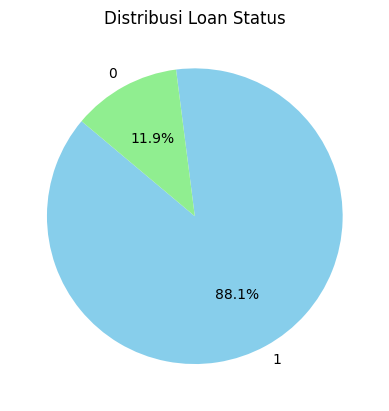

In [186]:
# Menghitung jumlah setiap nilai dalam kolom "Loan_Status"
loan_status_counts = y_train.value_counts()

# Membuat pie chart
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribusi Loan Status')
plt.show()

In [184]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Columns: 101 entries, grade_B to next_pymnt_d_day_month_now
dtypes: float64(25), uint8(76)
memory usage: 101.0 MB


### Oversampling pada train_data

In [185]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

### Naive bayes

In [192]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train_res, y_train_res)
Y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, Y_pred)

print("Akurasi {}".format(acc))
print(classification_report(y_test, Y_pred))
# print(list(le.classes_))

Akurasi 0.5791200660540228
              precision    recall  f1-score   support

           0       0.18      0.71      0.29     11080
           1       0.93      0.56      0.70     82177

    accuracy                           0.58     93257
   macro avg       0.56      0.64      0.49     93257
weighted avg       0.85      0.58      0.65     93257



## Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train_res,y_train_res)
pred_cv_tree=tree_model.predict(X_test)
score_tree =accuracy_score(pred_cv_tree,y_test)*100 
print(score_tree)
print(classification_report(y_test, pred_cv_tree))

91.9759374631395
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     11080
           1       0.96      0.95      0.95     82177

    accuracy                           0.92     93257
   macro avg       0.80      0.83      0.82     93257
weighted avg       0.92      0.92      0.92     93257



## Radom Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(X_train_res,y_train_res)
pred_cv_forest=forest_model.predict(X_test)
score_forest = accuracy_score(pred_cv_forest,y_test)*100
print("akurasi:",score_forest)
print(classification_report(y_test, pred_cv_forest))

akurasi: 92.1249879365624
              precision    recall  f1-score   support

           0       0.64      0.78      0.70     11080
           1       0.97      0.94      0.95     82177

    accuracy                           0.92     93257
   macro avg       0.80      0.86      0.83     93257
weighted avg       0.93      0.92      0.92     93257



## XGBoost

In [204]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)
xgb_model.fit(X_train_res,y_train_res)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  93.89750903417438
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     11080
           1       0.96      0.97      0.97     82177

    accuracy                           0.94     93257
   macro avg       0.86      0.85      0.85     93257
weighted avg       0.94      0.94      0.94     93257

